# Problem 1 :- Multinomial Classification
#  : Activity is normal or DOS or PROBE or R2L or U2R

## Importing packages and data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas_profiling
from patsy import dmatrices
import statsmodels.formula.api as sm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
train = pd.read_csv('Train.txt', header = None)
test = pd.read_csv('Test.txt', header = None)

In [5]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
columns_name = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
                "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
                "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
                "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", 
                "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", 
                "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
                "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack", "last_flag"] 

In [7]:
train.columns = columns_name
test.columns = columns_name

In [8]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [11]:
train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


#### attack_class
- 0 = normal
- 1 = DoS
- 2 = Probe
- 3 = R2L
- 4 = U2R

In [13]:
train.loc[train.attack == 'normal', 'attack_class'] = 0

train.loc[(train.attack == 'back') | (train.attack == 'land') | (train.attack == 'neptune') | (train.attack == 'pod') | 
          (train.attack == 'smurf') | (train.attack == 'teardrop') | (train.attack == 'apache2') | (train.attack == 'udpstorm') | 
          (train.attack == 'processtable') | (train.attack == 'worm') | (train.attack=='mailbomb'), 'attack_class'] = 1

train.loc[(train.attack == 'satan') | (train.attack == 'ipsweep') | (train.attack == 'nmap') | (train.attack == 'portsweep') | 
          (train.attack == 'mscan') | (train.attack == 'saint'), 'attack_class' ] = 2

train.loc[(train.attack == 'guess_passwd') | (train.attack == 'ftp_write') | (train.attack == 'imap') | (train.attack == 'phf') | 
          (train.attack == 'multihop') | (train.attack == 'warezmaster') | (train.attack == 'warezclient') | (train.attack == 'spy') | 
          (train.attack == 'xlock') | (train.attack == 'xsnoop') | (train.attack == 'snmpguess') | (train.attack == 'snmpgetattack') | 
          (train.attack == 'httptunnel') | (train.attack == 'sendmail') | (train.attack == 'named'), 'attack_class' ] = 3

train.loc[(train.attack == 'buffer_overflow') | (train.attack == 'loadmodule') | (train.attack == 'rootkit') | (train.attack == 'perl') | 
          (train.attack == 'sqlattack') | (train.attack == 'xterm') | (train.attack == 'ps'), 'attack_class'] = 4

In [14]:
test.loc[test.attack == 'normal', 'attack_class'] = 0

test.loc[(test.attack == 'back') | (test.attack == 'land') | (test.attack == 'neptune') | (test.attack == 'pod') | 
         (test.attack == 'smurf') | (test.attack == 'teardrop') | (test.attack == 'apache2') | (test.attack == 'udpstorm') | 
         (test.attack == 'processtable') | (test.attack == 'worm') | (test.attack=='mailbomb'), 'attack_class'] = 1

test.loc[(test.attack == 'satan') | (test.attack == 'ipsweep') | (test.attack == 'nmap') | (test.attack == 'portsweep') | 
         (test.attack == 'mscan') | (test.attack == 'saint'), 'attack_class' ] = 2

test.loc[(test.attack == 'guess_passwd') | (test.attack == 'ftp_write') | (test.attack == 'imap') | (test.attack == 'phf') | 
         (test.attack == 'multihop') | (test.attack == 'warezmaster') | (test.attack == 'warezclient') | (test.attack == 'spy') | 
         (test.attack == 'xlock') | (test.attack == 'xsnoop') | (test.attack == 'snmpguess') | (test.attack == 'snmpgetattack') | 
         (test.attack == 'httptunnel') | (test.attack == 'sendmail') | (test.attack == 'named'), 'attack_class' ] = 3

test.loc[(test.attack == 'buffer_overflow') | (test.attack == 'loadmodule') | (test.attack == 'rootkit') | (test.attack == 'perl') | 
         (test.attack == 'sqlattack') | (test.attack == 'xterm') | (test.attack == 'ps'), 'attack_class'] = 4

In [15]:
train['attack_1_VS_All'] = train.attack_class.apply(lambda x : 0 if x == 0 else 1)

In [16]:
test['attack_1_VS_All'] = test.attack_class.apply(lambda x : 0 if x == 0 else 1)

## Exporting pandas profiling output to html file

In [17]:
report = pandas_profiling.ProfileReport(train)
report.to_file(output_file = 'pandas_profiling.html')

## Data exploratory analysis

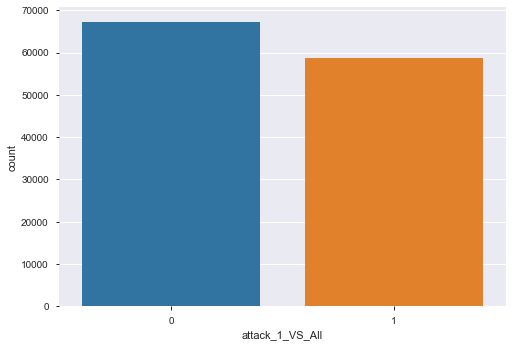

<Figure size 432x720 with 0 Axes>

In [18]:
sns.countplot(train.attack_1_VS_All)
plt.figure(figsize=(6,10))
plt.show()

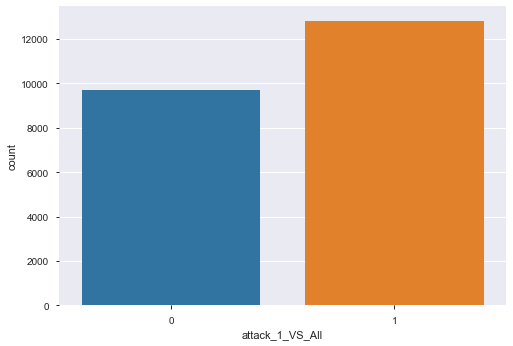

<Figure size 432x720 with 0 Axes>

In [19]:
sns.countplot(test.attack_1_VS_All)
plt.figure(figsize=(6,10))
plt.show()

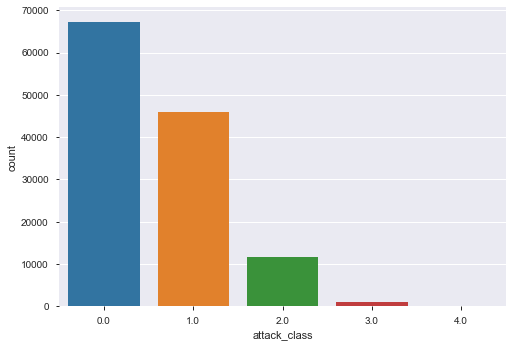

<Figure size 432x720 with 0 Axes>

In [20]:
sns.countplot(train.attack_class)
plt.figure(figsize=(6,10))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

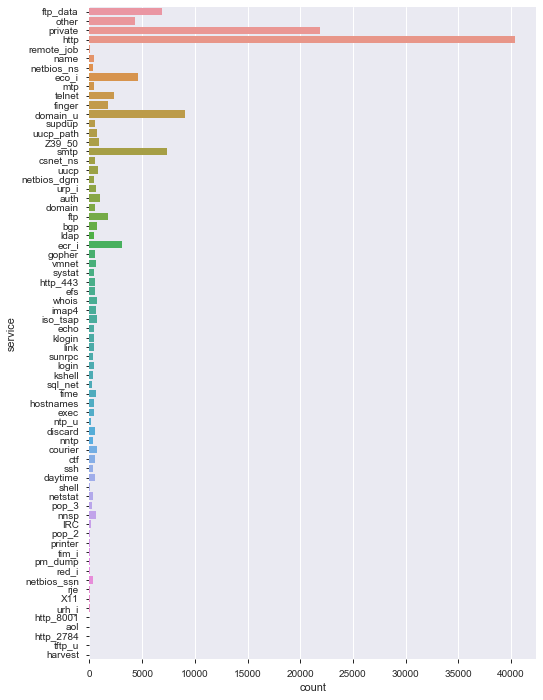

In [21]:
plt.figure(figsize = (8, 12))
sns.countplot(y = train.service)
plt.show

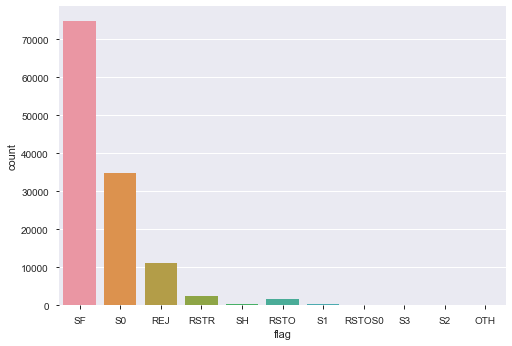

In [22]:
sns.countplot(train.flag)
plt.show()

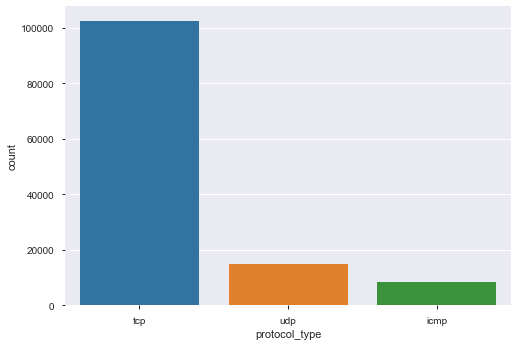

In [23]:
sns.countplot(train.protocol_type)
plt.show()

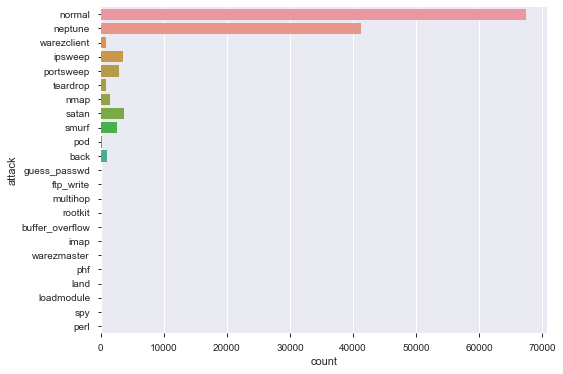

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(y = train.attack)
plt.show()

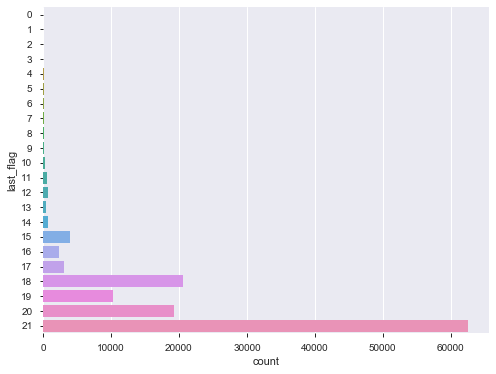

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(y = train.last_flag)
plt.show()

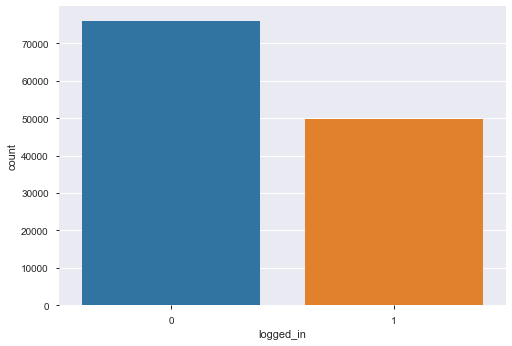

In [26]:
sns.countplot(train.logged_in)

In [27]:
train.groupby('attack_class').mean().T

attack_class,0.0,1.0,2.0,3.0,4.0
duration,168.587396,0.006227,2074.858185,633.417085,80.942308
src_bytes,13133.279331,1176.321162,385679.838367,307727.300503,906.230769
dst_bytes,4329.685223,169.201537,181074.911805,81822.026131,5141.961538
land,0.000104,0.000392,0.000000,0.000000,0.000000
wrong_fragment,0.000000,0.062229,0.000000,0.000000,0.000000
urgent,0.000148,0.000000,0.000000,0.003015,0.019231
hot,0.230655,0.039889,0.001630,8.334673,1.403846
num_failed_logins,0.001381,0.000000,0.000343,0.056281,0.019231
logged_in,0.710646,0.020837,0.007121,0.913568,0.884615
num_compromised,0.507076,0.019226,0.000601,0.077387,1.211538


In [28]:
train_numeric_variable = train.select_dtypes(include = ['float64', 'int64'])
train_categorical_variable = train.select_dtypes(include = ['object'])

In [29]:
test_numeric_variable = test.select_dtypes(include = ['float64', 'int64'])
test_categorical_variable = test.select_dtypes(include = ['object'])

In [30]:
train_numeric_variable.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class,attack_1_VS_All
0,0,491,0,0,0,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0.0,0
1,0,146,0,0,0,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1.0,1
3,0,232,8153,0,0,0,0,0,1,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0.0,0
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0.0,0


In [31]:
train_categorical_variable.head()

,protocol_type,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal


## Data Audit Report

In [32]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [33]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [34]:
num_summary = train_numeric_variable.apply(lambda x : continuous_var_summary(x))
# num_summary.T

In [35]:
num_summary.to_csv('num_summary.csv')

In [36]:
cat_summary = train_categorical_variable.apply(lambda x : categorical_var_summary(x))
cat_summary

,protocol_type,service,flag,attack
N,125973,125973,125973,125973
NMISS,0,0,0,0
MODE,tcp,http,SF,normal
FREQ,102689,40338,74945,67343
PERCENT,81.52,32.02,59.49,53.46


## Handling Outlier

In [37]:
train_numeric_variable = train_numeric_variable.apply(lambda x : x.clip(lower = x.dropna().quantile(0.05), upper = x.quantile(0.95)))

## Creating Dummy Variables

In [38]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [39]:
for i in ['protocol_type', 'service', 'flag', 'attack']:
    train_categorical_variable = create_dummies(train_categorical_variable, i)
    test_categorical_variable = create_dummies(test_categorical_variable, i)

In [40]:
train_categorical_variable.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
new_train = pd.concat([train_numeric_variable, train_categorical_variable], axis = 1)
new_test = pd.concat([test_numeric_variable, test_categorical_variable], axis = 1)

In [42]:
new_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# correlation matrix (ranges from 1 to -1)
corrm = new_train.corr()
corrm.to_csv("corrm.csv")
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.228230,0.037963,NaN,NaN,NaN,NaN,NaN,0.083903,NaN,...,0.010614,-0.010901,0.244894,0.020625,-0.030166,-0.039942,0.016097,-0.023028,0.067838,0.041396
src_bytes,0.228230,1.000000,0.191872,NaN,NaN,NaN,NaN,NaN,0.509934,NaN,...,-0.002622,0.126702,-0.089939,0.000866,-0.101049,0.253773,-0.000590,-0.044274,0.112385,-0.005917
dst_bytes,0.037963,0.191872,1.000000,NaN,NaN,NaN,NaN,NaN,0.544409,NaN,...,0.018680,-0.018197,-0.069621,0.007087,-0.077912,-0.066675,0.000392,-0.038438,-0.006246,0.036294
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.039942,0.253773,-0.066675,NaN,NaN,NaN,NaN,NaN,-0.118537,NaN,...,-0.000825,-0.005856,-0.022607,-0.001305,-0.025241,1.000000,-0.000584,-0.012370,-0.012356,-0.001846
attack_spy,0.016097,-0.000590,0.000392,NaN,NaN,NaN,NaN,NaN,0.000850,NaN,...,-0.000022,-0.000159,-0.000615,-0.000036,-0.000687,-0.000584,1.000000,-0.000336,-0.000336,-0.000050
attack_teardrop,-0.023028,-0.044274,-0.038438,NaN,NaN,NaN,NaN,NaN,-0.068340,NaN,...,-0.000476,-0.003376,-0.013034,-0.000752,-0.014552,-0.012370,-0.000336,1.000000,-0.007123,-0.001064
attack_warezclient,0.067838,0.112385,-0.006246,NaN,NaN,NaN,NaN,NaN,0.104233,NaN,...,-0.000475,-0.003372,-0.013019,-0.000752,-0.014536,-0.012356,-0.000336,-0.007123,1.000000,-0.001063


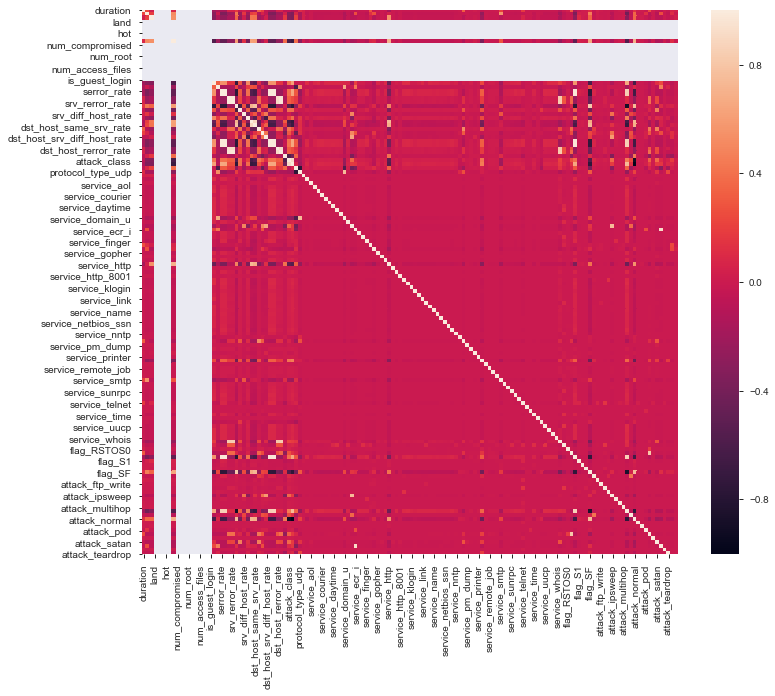

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(corrm)
plt.show()

### Dropping columns based on data audit report
        - Based on low variance (near zero variance)
        - High missings (>25% missings)
        - High correlations between two numerical variables

In [45]:
new_train.drop(columns = ['dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_serror_rate',
                          'num_root', 'rerror_rate', 'serror_rate', 'srv_rerror_rate', 'srv_serror_rate', 'num_outbound_cmds',
                          'is_guest_login', 'is_host_login', 'land', 'num_file_creations', 'num_access_files', 'num_failed_logins',
                          'num_shells', 'root_shell', 'srv_diff_host_rate', 'su_attempted', 'urgent', 'wrong_fragment'], axis = 1,
               inplace = True)

### Variable Reduction Using RFE (Recursive Feature Elimination)

In [46]:
target = new_train['attack_class']
data = new_train[new_train.columns.difference(['attack_class'])]

In [47]:
import warnings
warnings.filterwarnings("ignore") #ignore ConvergenceWarning

rfe = RFE(LogisticRegression(), 20).fit(data, target)
rfe.ranking_

array([  1,  59,  85,  51,  77,   1,  76,  81,  84,   1,   1,   1,  93,
        89,   1,   1,  80,   1,   1,  98,   1,   1,  74,  23,   1,  26,
        24,   1,   3,  13,  22,  18,  10,  17,  49,  32,  11,   1,  38,
        86,  83,  19,   9, 101,  14,   7, 102,   5,   8,  16,  53,  40,
        97,  28,  43,  29,  50,  55,  57,  54,  72,  12,  69,   1,   1,
        34,  36,   2,   1,   1,  71,  95,  66,   1, 100,  33,  96,  56,
        52,  35,  42,  41,  70,  39,  73,  64,  60,  58,  63,  67,  30,
        68,  37,   4,  90,  92,  31,  82,   6,  88,  78,  79,  91,  15,
        65,  75,  61,  47,  62,   1,  94,  99,  48,  87,  20,  27,  44,
        45,  46,  25,  21])

In [48]:
a = pd.DataFrame({'Features' : list(data.columns),
              'Ranking'  : rfe.ranking_})
ranked_rfe = a.sort_values(by = 'Ranking')
ranked_rfe[ranked_rfe.Ranking == 1]

,Features,Ranking
0,attack_1_VS_All,1
27,dst_host_diff_srv_rate,1
24,diff_srv_rate,1
21,attack_warezclient,1
20,attack_teardrop,1
37,flag_S0,1
18,attack_smurf,1
17,attack_satan,1
64,service_ecr_i,1
15,attack_portsweep,1


In [49]:
data.columns[rfe.support_]

Index(['attack_1_VS_All', 'attack_ipsweep', 'attack_neptune', 'attack_nmap',
       'attack_normal', 'attack_pod', 'attack_portsweep', 'attack_satan',
       'attack_smurf', 'attack_teardrop', 'attack_warezclient',
       'diff_srv_rate', 'dst_host_diff_srv_rate', 'flag_S0', 'service_eco_i',
       'service_ecr_i', 'service_ftp', 'service_ftp_data', 'service_http',
       'service_telnet'],
      dtype='object')

### Variable Reduction Using Select K-Best Technique

In [50]:
k_best = SelectKBest(f_classif, k = 20).fit(data, target)

In [51]:
b = pd.DataFrame({'Features' : data.columns,
                  'Scores'   : k_best.scores_})
b.sort_values(by = 'Scores', ascending = False)[:20].round()

,Features,Scores
0,attack_1_VS_All,inf
11,attack_normal,inf
9,attack_neptune,349983.0
49,same_srv_rate,134328.0
41,flag_SF,110778.0
37,flag_S0,110262.0
30,dst_host_srv_count,69239.0
29,dst_host_same_srv_rate,67029.0
23,count,59564.0
45,logged_in,57574.0


In [52]:
data.columns[k_best.get_support()]

Index(['attack_1_VS_All', 'attack_ipsweep', 'attack_neptune', 'attack_normal',
       'attack_portsweep', 'attack_satan', 'count', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'service_eco_i',
       'service_http', 'service_private'],
      dtype='object')

### Applying VIF (Variance Inflation Factor)

'attack_ipsweep', 'attack_neptune', 'attack_normal', 'attack_portsweep','attack_satan', 'count', 'dst_host_count', 'dst_host_diff_srv_rate','dst_host_same_src_port_rate', 'dst_host_same_srv_rate','dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'flag_S0','flag_SF', 'last_flag', 'logged_in', 'same_srv_rate', 'service_eco_i','service_http', 'service_private','attack_ipsweep', 'attack_neptune', 'attack_nmap', 'attack_normal','attack_pod', 'attack_portsweep', 'attack_satan', 'attack_smurf','attack_teardrop', 'attack_warezclient', 'dst_host_diff_srv_rate','dst_host_same_src_port_rate', 'flag_S0', 'service_eco_i','service_ecr_i', 'service_finger', 'service_ftp', 'service_ftp_data','service_http', 'service_telnet'

In [53]:
a = 'attack_ipsweep + attack_neptune + attack_normal + attack_portsweep + attack_satan + count + dst_host_count + dst_host_diff_srv_rate + dst_host_same_src_port_rate + dst_host_same_srv_rate + dst_host_srv_count + dst_host_srv_diff_host_rate + flag_S0 + flag_SF + last_flag + logged_in + same_srv_rate + service_eco_i + service_http + service_private + attack_nmap + attack_pod + attack_smurf + attack_teardrop + attack_warezclient + service_ecr_i + service_finger + service_ftp + service_ftp_data + service_telnet'
a

'attack_ipsweep + attack_neptune + attack_normal + attack_portsweep + attack_satan + count + dst_host_count + dst_host_diff_srv_rate + dst_host_same_src_port_rate + dst_host_same_srv_rate + dst_host_srv_count + dst_host_srv_diff_host_rate + flag_S0 + flag_SF + last_flag + logged_in + same_srv_rate + service_eco_i + service_http + service_private + attack_nmap + attack_pod + attack_smurf + attack_teardrop + attack_warezclient + service_ecr_i + service_finger + service_ftp + service_ftp_data + service_telnet'

In [54]:
# separate the Y and X variables
y, X = dmatrices('attack_class ~ ' + a, new_train, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Features,VIF Factor
0,Intercept,393.594306
1,attack_ipsweep,7.090999
2,attack_neptune,47.041140
3,attack_normal,36.641575
4,attack_portsweep,5.015978
5,attack_satan,5.720076
6,count,3.240749
7,dst_host_count,2.760517
8,dst_host_diff_srv_rate,3.217061
9,dst_host_same_src_port_rate,2.889263


Select those variavle which have less than 5 VIF Factor

In [55]:
vif = vif[vif['VIF Factor'] < 5]

In [56]:
vif.Features.unique()

array(['count', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'flag_S0', 'last_flag', 'logged_in', 'service_eco_i',
       'service_http', 'service_private', 'attack_nmap', 'attack_pod',
       'attack_teardrop', 'attack_warezclient', 'service_finger',
       'service_ftp', 'service_ftp_data', 'service_telnet'], dtype=object)

### Final list of variable for model building

'count', 'dst_host_count', 'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
'flag_S0', 'last_flag', 'logged_in', 'service_eco_i', 'hot,
'service_http', 'service_private', 'attack_nmap', 'attack_pod',
'attack_teardrop', 'attack_warezclient', 'service_finger',
'service_ftp', 'service_ftp_data', 'service_telnet'

## Model Building

In [57]:
features = ['count', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
            'flag_S0', 'last_flag', 'logged_in', 'hot', 'service_eco_i', 'service_http', 'service_private', 'attack_nmap', 
            'attack_pod', 'attack_teardrop', 'service_finger', 'service_ftp', 'service_ftp_data', 
            'service_telnet']

In [58]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag', 'attack_class',
       'attack_1_VS_All'],
      dtype='object')

In [59]:
train = new_train
test = new_test

In [60]:
# split train and test
train_X = train[features]
train_y = train['attack_class']

test_X = test[features]
test_y= test['attack_class']

## Logistic Regression Model 

In [61]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
logreg.predict_proba(train_X)

array([[9.60301708e-01, 2.66915763e-02, 1.30067158e-02],
       [2.97856867e-01, 5.84864923e-02, 6.43656641e-01],
       [2.05525525e-04, 9.95915478e-01, 3.87899616e-03],
       ...,
       [9.46552999e-01, 4.78531222e-02, 5.59387893e-03],
       [2.30549144e-03, 9.97378207e-01, 3.16301235e-04],
       [9.67605017e-01, 2.54496271e-02, 6.94535617e-03]])

In [63]:
list(zip(features, logreg.coef_[0]))

[('count', -0.008481241438157896),
 ('dst_host_count', -0.0018087412486846046),
 ('dst_host_diff_srv_rate', -0.7259623575308609),
 ('dst_host_same_src_port_rate', -1.0871289036640723),
 ('dst_host_srv_diff_host_rate', -0.27992390764143743),
 ('flag_S0', -2.9759612333029946),
 ('last_flag', 0.22263479444846093),
 ('logged_in', 0.3301926838974258),
 ('hot', 0.0),
 ('service_eco_i', -1.1194200835351882),
 ('service_http', 0.40342512183141377),
 ('service_private', -2.402180209840292),
 ('attack_nmap', -0.47388978206888044),
 ('attack_pod', -0.1661962306557192),
 ('attack_teardrop', -0.20987354344936193),
 ('service_finger', -0.1357646652856589),
 ('service_ftp', -0.41075750325472654),
 ('service_ftp_data', -0.21053492732703522),
 ('service_telnet', -0.2677343790619135)]

In [64]:
#Predicting the test cases
hr_test_pred = pd.DataFrame({'actual' : test_y,
                             'predicted': logreg.predict(test_X)})

In [65]:
hr_test_pred = hr_test_pred.reset_index()

In [66]:
#Comparing the predictions with actual test data
hr_test_pred.sample(n = 10)

,index,actual,predicted
14353,14353,2.0,0.0
16854,16854,2.0,0.0
11571,11571,0.0,0.0
12007,12007,1.0,0.0
12857,12857,3.0,2.0
1521,1521,2.0,1.0
3200,3200,1.0,1.0
14942,14942,2.0,2.0
785,785,0.0,0.0
1251,1251,1.0,1.0


In [67]:
from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[4900, 2449],
       [ 155, 8750]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

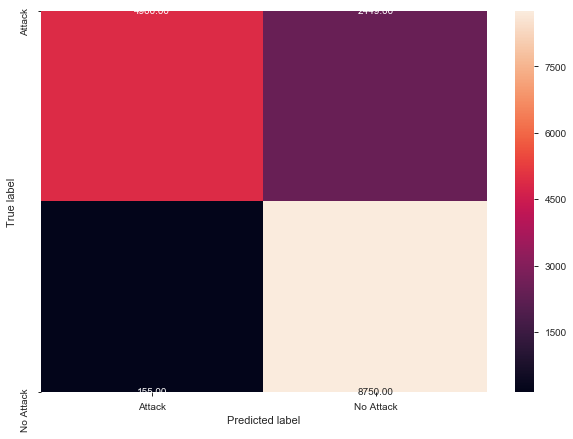

In [68]:
plt.rcParams["figure.figsize"] = (10,7)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Attack", "No Attack"] , yticklabels = ["Attack", "No Attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [69]:
logreg.score(train_X, train_y)

0.9110126773197431

### RidgeClassifier

In [70]:
from sklearn.linear_model import RidgeClassifier

In [71]:
rigclf = RidgeClassifier().fit(train_X, train_y)

In [72]:
rigclf.predict(train_X)

array([0., 2., 1., ..., 0., 1., 0.])

In [73]:
#Predicting the test cases
hr_test_pred = pd.DataFrame({'actual' : test_y,
                             'predicted': rigclf.predict(test_X)})

In [74]:
hr_test_pred = hr_test_pred.reset_index()

In [75]:
#Comparing the predictions with actual test data
hr_test_pred.sample(n = 10)

,index,actual,predicted
11164,11164,0.0,0.0
18973,18973,0.0,0.0
14941,14941,0.0,0.0
13017,13017,1.0,1.0
17492,17492,0.0,0.0
6,6,0.0,0.0
4341,4341,0.0,0.0
365,365,0.0,0.0
13856,13856,2.0,2.0
9694,9694,0.0,0.0


In [76]:
from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[3936, 2824],
       [ 561, 8735]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

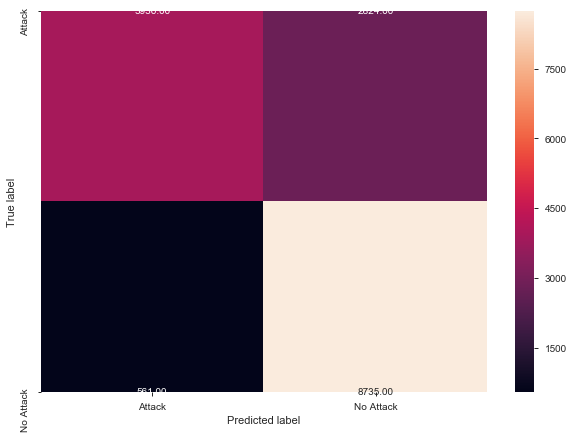

In [77]:
plt.rcParams["figure.figsize"] = (10,7)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Attack", "No Attack"] , yticklabels = ["Attack", "No Attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [78]:
rigclf.score(train_X, train_y)

0.9146721916601176

## Decision Tree Model

In [79]:
from sklearn import metrics
import sklearn.tree as dt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 10 )
dt.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
pd.DataFrame(dt.predict_proba(train_X))[1]

0         0.142624
1         0.099125
2         0.996799
3         0.001889
4         0.001889
            ...   
125968    0.996799
125969    0.001889
125970    0.455236
125971    0.996799
125972    0.001889
Name: 1, Length: 125973, dtype: float64

In [82]:
dt.predict(train_X)

array([0., 2., 1., ..., 1., 1., 0.])

In [83]:
print(metrics.classification_report(train_y, dt.predict(train_X)))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     67343
         1.0       0.87      0.92      0.90     45927
         2.0       0.71      0.66      0.69     12703

    accuracy                           0.90    125973
   macro avg       0.85      0.84      0.84    125973
weighted avg       0.90      0.90      0.90    125973



In [84]:
print(metrics.classification_report(test_y, dt.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      9711
         1.0       0.84      0.75      0.79      7460
         2.0       0.26      0.61      0.37      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.70     22544
   macro avg       0.39      0.45      0.40     22544
weighted avg       0.67      0.70      0.67     22544



In [85]:
# Using Gridsearch, tuning the parameters
param_grid = {'max_depth': np.arange(5, 10), 'max_features': np.arange(5, 10)}

In [86]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                

In [87]:
tree.best_params_

{'max_depth': 9, 'max_features': 9}

In [88]:
tree.best_score_

0.9849253889047033

### Building Final Decision Tree Model

In [89]:
dt_tree = DecisionTreeClassifier(max_depth = 9 , max_leaf_nodes = 9)
dt_tree.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
tree.predict(train_X)

array([0., 2., 1., ..., 0., 1., 0.])

In [91]:
tree_test_pred = pd.DataFrame({'actual' : test_y,
                             'predicted': dt_tree.predict(test_X)})

In [92]:
tree_test_pred.sample( n = 10 )

,actual,predicted
2149,1.0,1.0
10133,0.0,0.0
16062,1.0,1.0
2924,0.0,0.0
17132,0.0,2.0
3667,0.0,0.0
13850,0.0,0.0
4801,0.0,0.0
20024,1.0,1.0
8683,1.0,1.0


In [93]:
#Train Accuracy
metrics.accuracy_score(train_y, dt_tree.predict(train_X))

0.9253411445309709

In [94]:
#Test Accuracy
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.7104329311568488

In [95]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
tree_cm

array([[5249,   46],
       [ 491, 8667]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

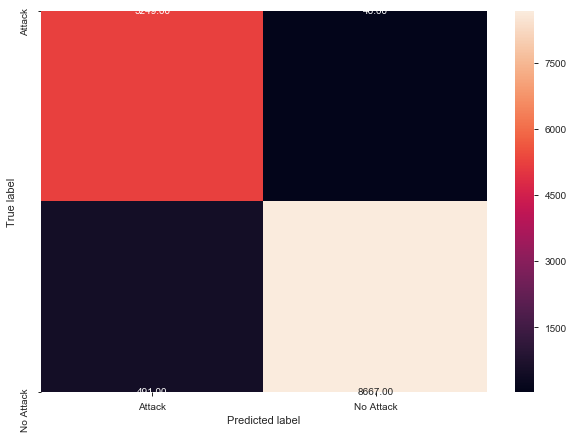

In [96]:
plt.rcParams["figure.figsize"] = (10,7)
sns.heatmap(tree_cm, annot = True,
         fmt='.2f',
         xticklabels = ["Attack", "No Attack"] , yticklabels = ["Attack", "No Attack"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [97]:
dt_tree.feature_importances_

array([0.09309608, 0.        , 0.10296172, 0.02925221, 0.        ,
       0.55873589, 0.21595409, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [98]:
var_imp = pd.concat([pd.Series(train_X.columns), pd.Series(dt_tree.feature_importances_)], axis=1)
var_imp.columns = ['Feature', 'Importance']
var_imp_sorted = var_imp.sort_values('Importance', ascending=False)
var_imp_sorted

,Feature,Importance
5,flag_S0,0.558736
6,last_flag,0.215954
2,dst_host_diff_srv_rate,0.102962
0,count,0.093096
3,dst_host_same_src_port_rate,0.029252
12,attack_nmap,0.000000
17,service_ftp_data,0.000000
16,service_ftp,0.000000
15,service_finger,0.000000
14,attack_teardrop,0.000000


## K-Nearest Neighbor Model

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [101]:
KNN.predict(train_X)

array([0., 2., 1., ..., 0., 1., 0.])

In [102]:
KNN.score(train_X, train_y)

0.9891643447405396

In [103]:
# Using Gridsearch, tuning the parameters
tuned_parameters = [{'n_neighbors': [2,3,5]}]

KNN = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv = 5)

In [104]:
KNN.fit(train_X, train_y)

KNN.best_score_

0.9838933754202337

In [105]:
KNN.best_params_

{'n_neighbors': 3}

### Building Final K-Nearest Neighbor Model

In [106]:
KNN = KNeighborsClassifier(n_neighbors = 3)

In [107]:
KNN.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [108]:
KNN_cm = metrics.confusion_matrix(test_y, KNN.predict(test_X))
KNN_cm

array([[8980,  452,  279,    0,    0],
       [ 840, 6269,  351,    0,    0],
       [ 517,  427, 1477,    0,    0],
       [1469,   49, 1367,    0,    0],
       [  36,    1,   30,    0,    0]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

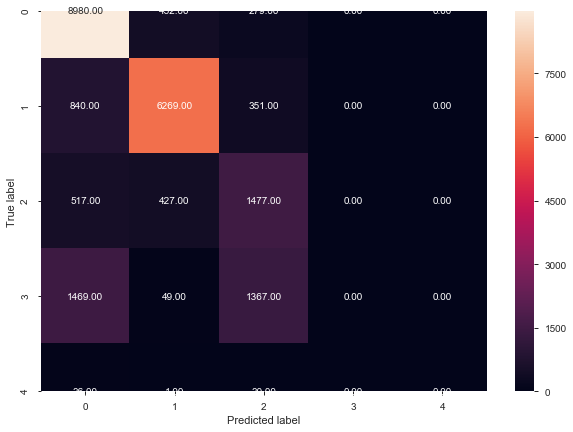

In [109]:
sns.heatmap(KNN_cm, annot = True, fmt = '.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [110]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(test_y, KNN.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83      9711
         1.0       0.87      0.84      0.86      7460
         2.0       0.42      0.61      0.50      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.74     22544
   macro avg       0.41      0.48      0.44     22544
weighted avg       0.66      0.74      0.70     22544



In [111]:
KNN.score(train_X, train_y)

0.9930381907234089

In [112]:
# accuracy=metrics.accuracy_score(test_y, KNN.predict(test_X ) )
# print("KNN model accuracy: %.3f" % (accuracy))

KNN.score(test_X, test_y)

0.7419268985095813

### Radius Neighbors Classifier

In [113]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [114]:
RNC = RadiusNeighborsClassifier(radius = 1)
RNC.fit(train_X, train_y)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=1, weights='uniform')

In [115]:
RNC.predict(train_X)

array([0., 0., 1., ..., 0., 1., 0.])

In [116]:
RNC.score(train_X, train_y)

0.98171830471609

 ### Nearest Centroid

In [117]:
from sklearn.neighbors import NearestCentroid

In [118]:
NC = NearestCentroid()
NC.fit(train_X, train_y)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [119]:
NC.predict(train_X)

array([0., 0., 1., ..., 0., 1., 0.])

In [120]:
NC.score(train_X, train_y)

0.7489620791756963

In [121]:
NC.score(test_X, test_y)

0.5786905606813343

## Naive Bayes Model

- GaussianNB ->	 When independent variables include continous
- BernoulliNB -> When data consists of binary categorical independent vars

#### GaussianNB

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [123]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [124]:
nb_clf.predict(train_X)

array([0., 2., 1., ..., 0., 1., 0.])

In [125]:
nb_cm = metrics.confusion_matrix(test_y, nb_clf.predict(test_X) )
nb_cm

array([[8312,  560,  839,    0,    0],
       [1475, 5287,  698,    0,    0],
       [ 213,  500, 1708,    0,    0],
       [ 618,  658, 1609,    0,    0],
       [   2,    3,   62,    0,    0]], dtype=int64)

In [126]:
metrics.accuracy_score(test_y, nb_clf.predict(test_X))

0.6789833215046132

#### BernoulliNB

In [127]:
nb_clf = BernoulliNB()
nb_clf.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [128]:
nb_clf.predict(train_X)

array([0., 2., 1., ..., 0., 1., 0.])

In [129]:
nb_cm = metrics.confusion_matrix(test_y, nb_clf.predict(test_X) )
nb_cm

array([[8165,  376, 1170,    0,    0],
       [1722, 5515,  223,    0,    0],
       [ 549, 1051,  821,    0,    0],
       [1747,  662,  476,    0,    0],
       [  64,    0,    3,    0,    0]], dtype=int64)

In [130]:
metrics.accuracy_score(test_y, nb_clf.predict(test_X))

0.6432310149041873

## Support Vector Machine Model

#### LinearSVC

In [131]:
from sklearn.svm import LinearSVC

In [132]:
L_SVM = LinearSVC()
L_SVM.fit(train_X, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [133]:
L_SVM.coef_

array([[-8.14404664e-03, -4.08103088e-03, -9.19443950e-01,
         2.12982729e-02, -1.95693294e+00, -9.20621907e-01,
         3.65993950e-01, -3.70663407e-01,  0.00000000e+00,
        -1.67383785e+00,  3.17715922e-02, -9.91166587e-01,
        -1.22368193e+00, -1.57524325e+00, -1.07195014e-01,
         8.31880515e-02,  8.07573125e-02, -2.77546503e-01,
        -3.17594228e-01],
       [ 1.16199774e-02,  3.61189208e-03, -2.04503801e+00,
        -9.41333174e-01, -2.56358686e+00,  1.71959977e+00,
        -2.46556061e-01,  1.02233305e+00,  0.00000000e+00,
        -2.70834503e-02,  2.05705452e-01,  1.01665394e+00,
        -8.01357632e-01,  3.97142571e+00,  1.36073991e+00,
         1.18721892e+00, -8.96300942e-01,  7.91533841e-02,
         3.58320106e-01],
       [ 1.07585817e-03,  2.10463231e-03,  1.40405673e+00,
         4.15212573e-01,  3.47949919e+00, -7.50387970e-01,
        -3.53316495e-01, -5.06875613e-02,  0.00000000e+00,
         1.04489075e+00, -8.80723010e-01,  7.12021654e-01,
    

In [134]:
L_SVM.intercept_

array([-5.2739996 ,  2.73698963,  4.82938111])

In [135]:
L_SVM.predict(train_X)

array([0., 2., 1., ..., 1., 1., 0.])

In [136]:
metrics.accuracy_score(test_y, L_SVM.predict(test_X))

0.7150904897090135

#### Support Vector Classifier

In [137]:
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline

In [138]:
# model = SVC(class_weight = 'balanced')  # here kernel = 'rgf' and gamma = 'scale'

In [139]:
# model.fit(train_X, train_y)

In [140]:
# param_grid = {'C': [1, 3, 5],
#               'gamma': [0.0001, 0.0005,0.001]}
# grid = GridSearchCV(model, param_grid, cv = 5)
# grid.fit(train_X, train_y)

In [141]:
# grid.best_params_

In [142]:
# model = grid.best_estimator_
# yfit = model.predict(Xtest)

In [143]:
# print(classification_report(test_y, yfit))

In [144]:
# mat = confusion_matrix(test_y, yfit)
# sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
# plt.xlabel('true label')
# plt.ylabel('predicted label');

## Stochastic Gradient Descent Model

In [145]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [146]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [147]:
model = SGDClassifier(loss = "hinge", penalty = "l2")
model.fit(train_X, train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [148]:
model.score(test_X, test_y)

0.6812899219304471

In [149]:
param = {
    "loss" : ["hinge", "log", "perceptron", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l1", "l2", "none"],
}

model = SGDClassifier(max_iter = 500)
clf = GridSearchCV(model, param)

In [150]:
clf.fit(train_X, train_y)
clf.best_score_

0.9377644554266041

In [151]:
clf.score(test_X, test_y)

0.683374733853797

# Problem 2 :-Binomial Classification : Activity is normal or attack

## Model Building

In [152]:
# split train and test
train_X = train[features]
train_y = train['attack_1_VS_All']

test_X = test[features]
test_y= test['attack_1_VS_All']

## Logistic Regression Model 

In [153]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
#Predicting the test cases
hr_test_pred = pd.DataFrame({'actual' : test_y,
                             'predicted': logreg.predict(test_X)})

In [155]:
hr_test_pred = hr_test_pred.reset_index()

In [156]:
#Comparing the predictions with actual test data
hr_test_pred.sample(n = 10)

,index,actual,predicted
10921,10921,0,0
11422,11422,1,1
15095,15095,1,1
11815,11815,0,0
1926,1926,1,1
6410,6410,1,1
12472,12472,1,1
15236,15236,0,0
5542,5542,1,1
3242,3242,0,0


In [157]:
from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[9335, 3498],
       [1091, 8620]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

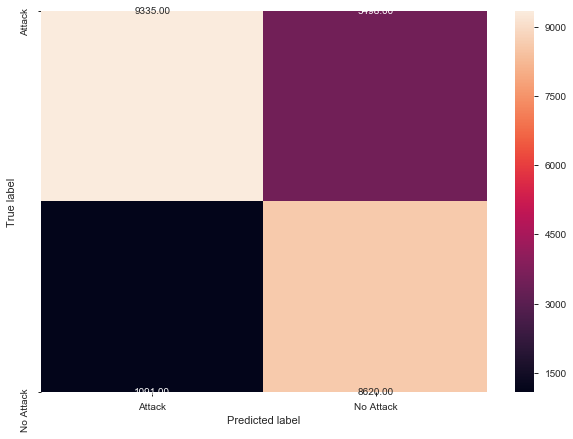

In [158]:
plt.rcParams["figure.figsize"] = (10,7)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Attack", "No Attack"] , yticklabels = ["Attack", "No Attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [159]:
logreg.score(train_X, train_y)

0.9311836663412001

### RidgeClassifier

In [160]:
from sklearn.linear_model import RidgeClassifier

In [161]:
rigclf = RidgeClassifier().fit(train_X, train_y)

In [162]:
#Predicting the test cases
hr_test_pred = pd.DataFrame({'actual' : test_y,
                             'predicted': rigclf.predict(test_X)})

In [163]:
hr_test_pred = hr_test_pred.reset_index()

In [164]:
#Comparing the predictions with actual test data
hr_test_pred.sample(n = 10)

,index,actual,predicted
14627,14627,0,0
17908,17908,0,0
1311,1311,0,0
4047,4047,1,1
22163,22163,0,0
6771,6771,1,1
502,502,1,0
12176,12176,0,0
18178,18178,0,0
18526,18526,1,1


In [165]:
rigclf.score(train_X, train_y)

0.9245632000508045

## Decision Tree Model

In [166]:
dt = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 10 )
dt.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [167]:
print(metrics.classification_report(train_y, dt.predict(train_X)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     67343
           1       0.96      0.97      0.97     58630

    accuracy                           0.97    125973
   macro avg       0.97      0.97      0.97    125973
weighted avg       0.97      0.97      0.97    125973



In [168]:
print(metrics.classification_report(test_y, dt.predict(test_X)))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78      9711
           1       0.91      0.66      0.77     12833

    accuracy                           0.77     22544
   macro avg       0.79      0.79      0.77     22544
weighted avg       0.81      0.77      0.77     22544



In [169]:
# Using Gridsearch, tuning the parameters
param_grid = {'max_depth': np.arange(5, 10), 'max_features': np.arange(5, 10)}

In [170]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                

In [171]:
tree.best_params_

{'max_depth': 9, 'max_features': 9}

In [172]:
tree.best_score_

0.9910457163977291

### Building Final Decision Tree Model

In [173]:
dt_tree = DecisionTreeClassifier(max_depth = 9 , max_leaf_nodes = 7)
dt_tree.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [174]:
tree_test_pred = pd.DataFrame({'actual' : test_y,
                             'predicted': dt_tree.predict(test_X)})

In [175]:
tree_test_pred.sample( n = 10 )

,actual,predicted
2764,1,1
10809,0,0
9057,1,1
14035,0,0
1177,1,1
17211,0,0
8739,0,0
1909,1,1
14873,1,0
17931,1,0


In [176]:
#Train Accuracy
metrics.accuracy_score(train_y, dt_tree.predict(train_X))

0.9498543338651934

In [177]:
#Test Accuracy
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.836985450674237

In [178]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
tree_cm

array([[10059,   901],
       [ 2774,  8810]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

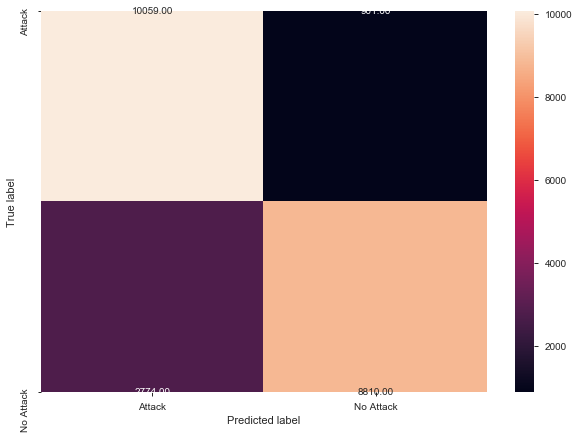

In [179]:
plt.rcParams["figure.figsize"] = (10,7)
sns.heatmap(tree_cm, annot = True,
         fmt='.2f',
         xticklabels = ["Attack", "No Attack"] , yticklabels = ["Attack", "No Attack"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [180]:
var_imp = pd.concat([pd.Series(train_X.columns), pd.Series(dt_tree.feature_importances_)], axis=1)
var_imp.columns = ['Feature', 'Importance']
var_imp_sorted = var_imp.sort_values('Importance', ascending=False)
var_imp_sorted

,Feature,Importance
7,logged_in,0.570515
2,dst_host_diff_srv_rate,0.190175
6,last_flag,0.097283
3,dst_host_same_src_port_rate,0.077603
0,count,0.064424
12,attack_nmap,0.000000
17,service_ftp_data,0.000000
16,service_ftp,0.000000
15,service_finger,0.000000
14,attack_teardrop,0.000000


## K-Nearest Neighbor Model

In [181]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [182]:
KNN.score(train_X, train_y)

0.9920379763917665

In [183]:
# Using Gridsearch, tuning the parameters
tuned_parameters = [{'n_neighbors': [2,3,5]}]

KNN = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv = 5)

In [184]:
KNN.fit(train_X, train_y)

KNN.best_score_

0.9882593868957323

In [185]:
KNN.best_params_

{'n_neighbors': 3}

### Building Final K-Nearest Neighbor Model

In [186]:
KNN = KNeighborsClassifier(n_neighbors = 3)

In [187]:
KNN.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [188]:
KNN_cm = metrics.confusion_matrix(test_y, KNN.predict(test_X))
KNN_cm

array([[ 8972,   739],
       [ 2683, 10150]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

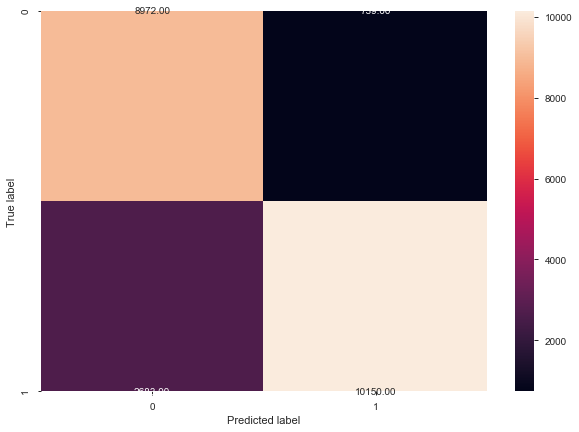

In [189]:
sns.heatmap(KNN_cm, annot = True, fmt = '.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [190]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(test_y, KNN.predict(test_X)))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      9711
           1       0.93      0.79      0.86     12833

    accuracy                           0.85     22544
   macro avg       0.85      0.86      0.85     22544
weighted avg       0.86      0.85      0.85     22544



In [191]:
KNN.score(train_X, train_y)

0.9953164567010391

In [192]:
KNN.score(test_X, test_y)

0.848207948899929

### Radius Neighbors Classifier

In [193]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [194]:
RNC = RadiusNeighborsClassifier(radius = 1)
RNC.fit(train_X, train_y)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=1, weights='uniform')

In [195]:
RNC.score(train_X, train_y)

0.9854016336834084

 ### Nearest Centroid

In [196]:
from sklearn.neighbors import NearestCentroid

In [197]:
NC = NearestCentroid()
NC.fit(train_X, train_y)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [198]:
NC.score(train_X, train_y)

0.821414112547927

In [199]:
NC.score(test_X, test_y)

0.6613733144073811

## Naive Bayes Model

- GaussianNB ->	 When independent variables include continous
- BernoulliNB -> When data consists of binary categorical independent vars

In [200]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [201]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [202]:
nb_cm = metrics.confusion_matrix(test_y, nb_clf.predict(test_X) )
nb_cm

array([[8638, 1073],
       [4441, 8392]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

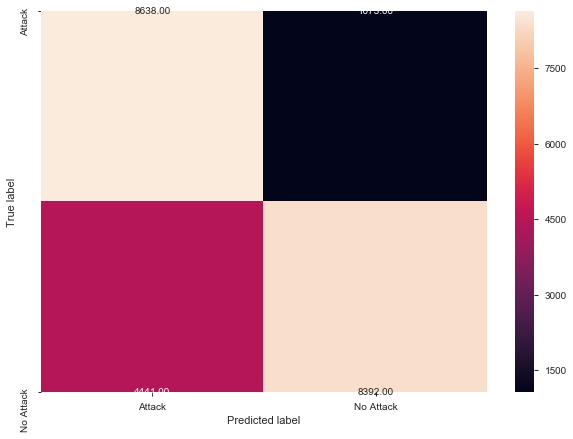

In [203]:
sns.heatmap(nb_cm, annot = True, fmt = '.2f',
           xticklabels = ["Attack", "No Attack"] , yticklabels = ["Attack", "No Attack"])
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [204]:
metrics.accuracy_score(test_y, nb_clf.predict(test_X))

0.7554116394606104

#### BernoulliNB

In [205]:
nb_clf = BernoulliNB()
nb_clf.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [206]:
nb_cm = metrics.confusion_matrix(test_y, nb_clf.predict(test_X) )
nb_cm

array([[7826, 1885],
       [4151, 8682]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

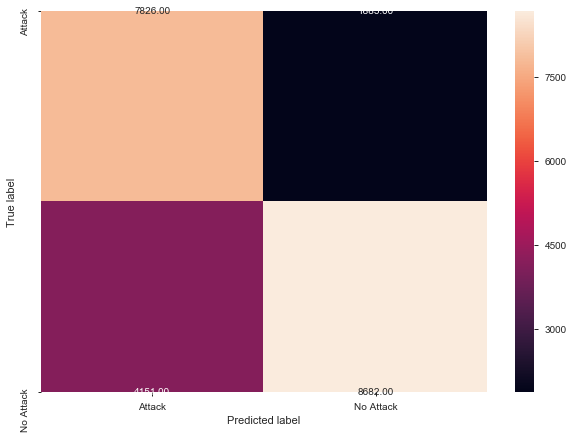

In [207]:
sns.heatmap(nb_cm, annot = True, fmt = '.2f',
           xticklabels = ["Attack", "No Attack"] , yticklabels = ["Attack", "No Attack"])
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Support Vector Machine Model

#### LinearSVC

In [208]:
from sklearn.svm import LinearSVC

In [209]:
L_SVM = LinearSVC()
L_SVM.fit(train_X, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [210]:
metrics.accuracy_score(test_y, L_SVM.predict(test_X))

0.896957061745919

## Stochastic Gradient Descent Model

In [211]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [212]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [213]:
model = SGDClassifier(loss = "hinge", penalty = "l2")
model.fit(train_X, train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [214]:
model.score(test_X, test_y)

0.8039833215046132

In [215]:
param = {
    "loss" : ["hinge", "log", "perceptron", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l1", "l2", "none"],
}

model = SGDClassifier(max_iter = 500)
clf = GridSearchCV(model, param)

In [216]:
clf.fit(train_X, train_y)
clf.best_score_

0.9438292393396759

In [217]:
clf.score(test_X, test_y)

0.8194641589779986